In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import copy

cf.go_offline(connected= True)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\yoon3\AppData\Local\Temp\ipykernel_7352\3777615979.py:1: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [3]:
from IPython.display import Image 

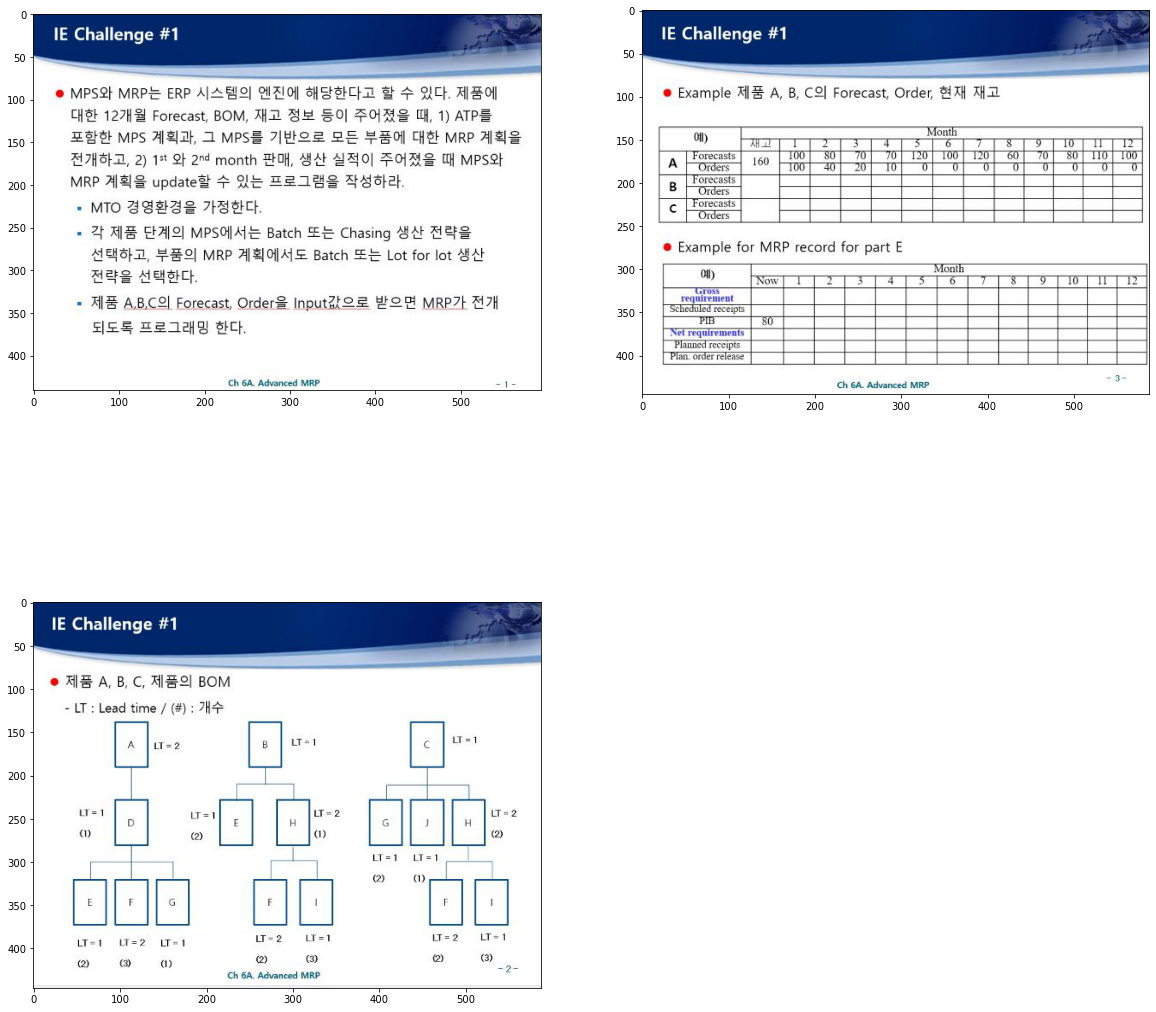

In [4]:
from plotly.subplots import make_subplots
import matplotlib.pylab as plt
from PIL import Image

img_file1 = 'data0.jpg'
img_file2 = "data.jpg"
img_file3 = "data1.jpg"

img1 = Image.open(img_file1).convert('RGB')
img2 = Image.open(img_file2).convert('RGB')
img3 = Image.open(img_file3).convert('RGB')

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(img1)
plt.subplot(2,2,2)
plt.imshow(img2)
plt.subplot(2,2,3)
plt.imshow(img3)


plt.show()

In [5]:
import pprint

bom = {'A': {'#':1, 'LT':2,'comp':
             {'D' : {'#':1, 'LT':1, 'comp':{
             'E' : {'#':2, 'LT':2, 'comp':{}}, 'F':{'#':3, 'LT':2,'comp': {}}, 'G':{'#':1, 'LT':1,'comp': {}}}}}}}

pprint.pprint(bom)

{'A': {'#': 1,
       'LT': 2,
       'comp': {'D': {'#': 1,
                      'LT': 1,
                      'comp': {'E': {'#': 2, 'LT': 2, 'comp': {}},
                               'F': {'#': 3, 'LT': 2, 'comp': {}},
                               'G': {'#': 1, 'LT': 1, 'comp': {}}}}}}}


In [6]:
# 리스트를 딕셔너리로 바꾸는 과정을 함수화.
def make_dict(lst):
    lst_dict = {}
    for i,j in enumerate(lst):
        lst_dict[i+1] = j
    return lst_dict

In [7]:
# 입력 정보 (12개월 데이터)

# 12개월 forecast
forecast = [int(i) for i in '100	80	70	70	120	100	120	60	70	80	110	100'.split('\t')]

# 12개월 order
order = [int(i) for i in '100	40	20	10	0	0	0	0	0	0	0	0'.split('\t')]


#12 개월 업데이트 시킬 데이터; 모두 0으로 기초 값 설정
PAB = [0] * 12
ATP = [0] * 12
MPS_scheduled = [0] * 12
MPS_release = [0] * 12


forecast_dict = make_dict(forecast)
order_dict = make_dict(order)   
PAB_dict = make_dict(PAB)
ATP_dict= make_dict(ATP)
MPS_scheduled_dict = make_dict(MPS_scheduled)
MPS_release_dict = make_dict(MPS_release)

df1 = pd.DataFrame(forecast_dict.values(),index = forecast_dict.keys(),columns = ['Forecast']).T
df2 = pd.DataFrame(order_dict.values(),index = order_dict.keys(),columns = ['Order']).T
df3 = pd.DataFrame(PAB_dict.values(),index = PAB_dict.keys(),columns = ['PAB']).T
df4 = pd.DataFrame(ATP_dict.values(),index = ATP_dict.keys(),columns = ['ATP']).T
df6 = pd.DataFrame(MPS_scheduled_dict.values(),index = MPS_scheduled_dict.keys(),columns = ['MPS_scheduled']).T
df5 = pd.DataFrame(MPS_release_dict.values(),index = MPS_release_dict.keys(),columns = ['MPS_release']).T


df = pd.concat([df1,df2,df3,df4,df5,df6])
df[0] = 0
df = df.T.sort_index().T
df.loc['PAB',0] = 160

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Forecast,0,100,80,70,70,120,100,120,60,70,80,110,100
Order,0,100,40,20,10,0,0,0,0,0,0,0,0
PAB,160,0,0,0,0,0,0,0,0,0,0,0,0
ATP,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_release,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_scheduled,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_2 = copy.deepcopy(df)

In [10]:
df_2 = copy.deepcopy(df)

product_A = Production(df_2,bom)

product_A.make_MRP_MPS()


In [11]:
df_2

,0,1,2,3,4,5,6,7,8,9,10,11,12
Forecast,0,100,80,70,70,120,100,120,60,70,80,110,100
Order,0,100,40,20,10,0,0,0,0,0,0,0,0
PAB,160,0,0,0,0,0,0,0,0,0,0,0,0
ATP,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_release,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_scheduled,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_2 = copy.deepcopy(df)

In [13]:
def product_ATP(df):

    lead_time = 2 
    num = 1

    ATP_lst = []
    ATP_sum = []
    idx = 0
    idx_standard = 0

    for idx in range(df.shape[1]):

        if idx == 0:
            pass

        elif idx ==1 :
            
            num = 0

            while 1:


                if idx >= (df.shape[1]):
                    break

                if df.loc['MPS_release',idx] != 0:

                    if  num == 0:
                        ATP_lst.append(df.loc['MPS_release',idx_standard] - df.loc['Order',idx_standard])
                        ATP_sum = []
                        break

                    ATP_lst.append(df.loc['PAB',idx_standard-1] - sum(ATP_sum))

                    ATP_sum = []                  
                    break

                elif df.loc['MPS_release',idx] == 0:
                    ATP_sum.append(df.loc['Order',idx])

                else:
                    pass

                num += 1
                idx += 1

        else:
            num = 0

            while 1:

                if idx >= (df.shape[1]):
                    break

                if df.loc['MPS_release',idx] != 0:

                    if  num == 0:
                        ATP_lst.append(df.loc['MPS_release',idx_standard] - df.loc['Order',idx_standard])

                        ATP_sum = []
                        break

                    a = df.loc['MPS_release',idx_standard] - sum(ATP_sum)

                    if a <= 0:
                        ATP_lst.append(0)
                        break


                    else:
                        ATP_lst.append( df.loc['MPS_release',idx_standard] - sum(ATP_sum))

                        ATP_sum = []

                        break

                elif df.loc['MPS_release',idx] == 0:

                    ATP_sum.append(df.loc['Order',idx])

                else:
                    pass
                
                idx += 1                    
                num += 1                

        idx_standard += 1


    df.loc['ATP',1:] = ATP_lst

    return df

In [63]:
class Production:
    
    def __init__(self, df, bom, mode = 'Chasing',lead_time =0 , num = 0):
        self.df = df
        self.mode = mode
        self.bom = bom
        self.mode = mode
        self.lead_time = lead_time
        self.num = num
        
    # MPS :주일정계획(master production schedule: MPS): 주(週) 또는 일(日)별로, 생산되어야 할 구체적인 제품 또는 제품군의 양을 명시한 것. 을 함수화
        
    def product_ATP(self,df):
        
        df = df.copy()

        lead_time = self.lead_time
        num = self.num

        ATP_lst = []
        ATP_sum = []
        idx = 0
        idx_standard = 0

        for idx in range(df.shape[1]):

            if idx == 0:
                pass

            elif idx ==1 :

                num = 0

                while 1:


                    if idx >= (df.shape[1]):
                        break

                    if df.loc['MPS_release',idx] != 0:

                        if  num == 0:
                            ATP_lst.append(df.loc['MPS_release',idx_standard] - df.loc['Order',idx_standard])
                            ATP_sum = []
                            break

                        ATP_lst.append(df.loc['PAB',idx_standard-1] - sum([int(i) for i in ATP_sum]))

                        ATP_sum = []                  
                        break

                    elif df.loc['MPS_release',idx] == 0:
                        ATP_sum.append(df.loc['Order',idx])

                    else:
                        pass

                    num += 1
                    idx += 1

            else:
                num = 0

                while 1:

                    if idx >= (df.shape[1]):
                        break

                    if df.loc['MPS_release',idx] != 0:

                        if  num == 0:
                            ATP_lst.append(df.loc['MPS_release',idx_standard] - df.loc['Order',idx_standard])

                            ATP_sum = []
                            break

                        a = df.loc['MPS_release',idx_standard] - sum(ATP_sum)

                        if a <= 0:
                            ATP_lst.append(0)
                            break


                        else:
                            ATP_lst.append( df.loc['MPS_release',idx_standard] - sum(ATP_sum))

                            ATP_sum = []

                            break

                    elif df.loc['MPS_release',idx] == 0:

                        ATP_sum.append(df.loc['Order',idx])
                        ATP_lst.append('None')
                        break

                    else:
                        pass

                    idx += 1                    
                    num += 1                

            idx_standard += 1


        df.loc['ATP',1:] = ATP_lst

        return df

    
    def product_MPS_scheduled(self, df):
        
        df = df.copy()
        lead_time = self.lead_time
        num = self.num
        
        MPS_scheduled_lst = []
        for idx, scheduled in enumerate(df.loc['MPS_scheduled',1:]):

            if  idx == 0:
                idx = idx+1
                MPS_scheduled_lst.append(-df.loc['PAB',idx+lead_time-1] +df.loc['Forecast',idx+lead_time])
                                                                      
            else:
                try:
                    idx = idx+1
                    MPS_scheduled_lst.append(-df.loc['PAB',idx+lead_time-1] +df.loc['Forecast',idx+lead_time])
                except:
                    MPS_scheduled_lst.append(0)



        df.loc['MPS_scheduled',1:] = MPS_scheduled_lst

        return df
    

    
    def product_MPS_release(self, df ):
        df = df.copy()
        
        lead_time = self.lead_time
        num = self.num

        MPS_release_lst = [0] * df.shape[1] 
        MPS_scheduled_lst = df.loc['MPS_scheduled',:].tolist()


        plus = [0] * lead_time
        MPS_release_lst = plus + MPS_scheduled_lst 

        MPS_release_lst = MPS_release_lst[:-lead_time] 

        df.loc['MPS_release',:] = MPS_release_lst

        return df 
  


    def product_PAB(self, df ):
        df = df.copy()

        lead_time = self.lead_time
        num = self.num

        PAB_lst = []

        for idx,j in enumerate(zip(df.loc['Forecast',:],df.loc['Order',:],df.loc['MPS_release',:])):

            if idx == 0:
                PAB_lst.append(df.loc['PAB',idx])

            else:

                PAB_lst.append(PAB_lst[idx - 1] - max(int(j[0]),int(j[1])) + int(j[2]))

        df.loc['PAB',:] = PAB_lst

        return df
    
    # MPS 최종 데이터 적용.
    def MPS_apply(self,df):
        
        df = df.copy()
        
        
        first = {'#' : self.use_bom_MRP(self.bom)[0][1], 'LT' :self.use_bom_MRP(self.bom)[0][2]}
        self.lead_time = first['LT']
        self.num = first['#']
        
        lead_time = self.lead_time
        num = self.num
        
        for _ in range(df.shape[1]):
            
            df = self.product_MPS_release(self.product_MPS_scheduled(self.product_PAB(df)))
        
        df = self.product_ATP(df)
        return df
    
    # MRP 만들기
    def MRP_make(self, df, lead_time , num ):
        
        df = df.copy()

        part = {'Gross_requirements' : [0]*df.shape[1] , 'scheduled_receipts' : [0]*df.shape[1], 'Projected_Inventory_Balanance' : [0] * df.shape[1] , 
            'Net_requirements' : [0]*df.shape[1] , 'Planned_receipts' : [0]*df.shape[1], 'Planned_order_release' : [0]*df.shape[1]} 

        if 'Forecast' in df.index:

            df_new = pd.DataFrame(part).T
            df_new.loc['Gross_requirements',:]  = df.loc['MPS_scheduled',:] * num
            df_new.loc['Planned_receipts'] = df_new.loc['Gross_requirements',:]

            new_lst = []
            new_lst = df_new.loc['Planned_receipts',:].tolist() + [0]*lead_time

            df_new.loc['Planned_order_release',:] = new_lst[lead_time:]


        else:

            df_new = pd.DataFrame(part).T
            df_new.loc['Gross_requirements',:]  = df.loc['Gross_requirements',:] * num
            df_new.loc['Planned_receipts'] = df_new.loc['Gross_requirements',:]

            new_lst = []
            new_lst = df_new.loc['Planned_receipts',:].tolist() + [0]*lead_time

            df_new.loc['Planned_order_release',:] = new_lst[lead_time:]


        return df_new
    
    
    # bom 에서 lead time과 num만 뽑아 낼 수 있으면 된다.
    def use_bom_MRP(self, bom, mode = 'chasing'):
        
        
        
        bom = self.bom.copy()
        
        num = 1
        bom_3 = copy.deepcopy(bom)
        while True:
            try :
                inner = [i for i in bom_3.values()][0]
                bom_3 = inner['comp']
                num+=1

            except:
                break

        bom_2 = copy.deepcopy(bom)
        lst_bom = []

        for j in range(num):
            keys = [i for i in bom_2.keys()]
            if len(keys)==1:
                key = keys[0]
                lst_bom.append((j+1,bom_2[key]['#'],bom_2[key]['LT'],key))
                bom_2 = bom_2.pop(key)
                bom_2 = bom_2['comp']

            else:
                bom_3 = copy.deepcopy(bom_2)
                for i in keys:
                    print(i)
                    lst_bom.append((j+1,bom_2[i]['#'], bom_2[i]['LT'],i))
                    
                    bom_2 = bom_2.pop(i)
                    bom_2 = bom_2['comp']
                    

                    if len(bom_2) == 0:
                        bom_2 = copy.deepcopy(bom_3)
                    
        return lst_bom
        
        
        
# [(1, 1, 2, 'A'),
#  (2, 1, 1, 'D'),
#  (3, 2, 2, 'E'),
#  (3, 3, 2, 'F'),
#  (3, 1, 1, 'G')]


            
    # MPS, MRP 실행
    def make_MRP_MPS(self,file_name):
        
        df_new = self.df.copy()
        bom = self.bom.copy() 
        df_MPS = self.MPS_apply(df_new).copy()
        bom_lst = self.use_bom_MRP(bom)
        
        writer = pd.ExcelWriter(str(file_name)+'.xlsx', engine='xlsxwriter')

        df_MPS.to_excel(writer, sheet_name= 'level_'+str(bom_lst[0][1])+'_'+bom_lst[0][3])
        
        num = max([i[0] for i in bom_lst])
        
        for k in range(num):
            k += 1
            
            if k == 1:
                df_a = self.MRP_make(df_MPS, lead_time = bom_lst[1][2], num= bom_lst[1][1])
                df_b = df_a.copy()
                df_b.to_excel(writer, sheet_name= 'level_'+str(bom_lst[1][0])+'_'+bom_lst[1][3])
                df_d = df_b.copy()
                
                
            else:

                for idx,w in enumerate(bom_lst):
                    if k == w[0]:
                        df_b = self.MRP_make(df_d, lead_time= bom_lst[idx][2],num = bom_lst[idx][1])
                        df_b.to_excel(writer, sheet_name= 'level_'+str(bom_lst[idx][0])+'_'+bom_lst[idx][3])
                        
                    else:
                        df_d = self.MRP_make(df_b, lead_time= bom_lst[idx][2],num = bom_lst[idx][1]) 
            
        
        writer.save()
        writer.close()    
            
        
        return df_MPS
    

In [64]:

bom = {'B': {'#':1, 'LT':1,'comp':
             {'E' : {'#':2, 'LT':1, 'comp':{}},
              'H' : {'#':1 , 'LT':2 ,'comp' :{
                  'F' : {'#': 2, 'LT' : 2, 'comp': {}},
                  'I' : {'#': 3, 'LT' :1 , 'comp':{}}
              }}}}}

In [65]:
Product_A = Production(df_2,bom)
Product_A.use_bom_MRP(bom)

E
H
F
I


[(1, 1, 1, 'B'),
 (2, 2, 1, 'E'),
 (2, 1, 2, 'H'),
 (3, 2, 2, 'F'),
 (3, 3, 1, 'I')]

In [53]:
Product_A.use_bom_MRP(bom)

[(1, 1, 1, 'B'), (2, 2, 1, 'E'), (2, 1, 2, 'H')]

In [16]:
df_test = pd.read_csv('test.csv',index_col =0)

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
df_test.columns = [i for i in range(12)]

In [ ]:
df_test

In [ ]:
df_test_2 = copy.deepcopy(df_test)

In [ ]:
Test = Production(df_test_2,bom)

In [ ]:
df_test_2

In [ ]:
Test.make_MRP_MPS('test_excel')

In [ ]:
Test.MPS_apply(df_test_2).copy()

In [ ]:
df_test

In [ ]:
def product_MPS_scheduled(df):

    df = df.copy()
    lead_time = 2
    num = 1

    MPS_scheduled_lst = []
    for idx, scheduled in enumerate(df.loc['MPS_scheduled',1:]):

        if  idx == 0:
            idx = idx+1
            MPS_scheduled_lst.append(-df.loc['PAB',idx+lead_time-1] +df.loc['Forecast',idx+lead_time])

        else:
            try:
                idx = idx+1
                MPS_scheduled_lst.append(-df.loc['PAB',idx+lead_time-1] +df.loc['Forecast',idx+lead_time])
            except:
                MPS_scheduled_lst.append(0)



    df.loc['MPS_scheduled',1:] = MPS_scheduled_lst

    return df

In [ ]:

def product_PAB( df ):

    df = df.copy()

    PAB_lst = []

    for idx,j in enumerate(zip(df.loc['Forecast',:],df.loc['Order',:],df.loc['MPS_release',:])):

        if idx == 0:
            PAB_lst.append(df.loc['PAB',idx])

        else:
            PAB_lst.append(PAB_lst[idx - 1] - max(int(j[0]),int(j[1])) + int(j[2]))
            print(PAB_lst[idx - 1] - max(int(j[0]),int(j[1])) + int(j[2]))
    
    df.loc['PAB',:] = PAB_lst
    
    return df

In [ ]:
def product_MPS_release( df ):
    df = df.copy()

    lead_time = 2
    num = 1

    MPS_release_lst = [0] * df.shape[1] 
    MPS_scheduled_lst = df.loc['MPS_scheduled',:].tolist()


    plus = [0] * lead_time
    MPS_release_lst = plus + MPS_scheduled_lst 

    MPS_release_lst = MPS_release_lst[:-lead_time] 

    df.loc['MPS_release',:] = MPS_release_lst

    return df 

In [ ]:
df_test_2 = copy.deepcopy(df_test)

In [ ]:

df_test_2 = product_MPS_release(product_MPS_scheduled(product_PAB(df_test_2)))
df_test_2

In [ ]:
df_test_2